In [1]:
!pip install ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 kB 8.0 MB/s eta 0:00:00


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model = YOLO('../yolov8n.pt')

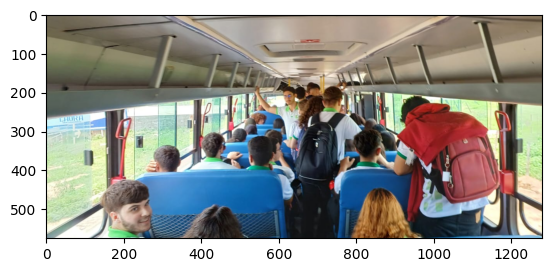

In [4]:
image = cv2.imread('./assets/bus-1.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [5]:
def image_preprocessing(image):
  image_matrix = np.array(image)

  width = image_matrix.shape[1]

  print(image_matrix.shape)

  image_matrix = image_matrix[:, int(width/2 - width/8): int(width/2 + width/8)]

  return image_matrix

In [ ]:
print(image_preprocessing(image))

(576, 1280, 3)


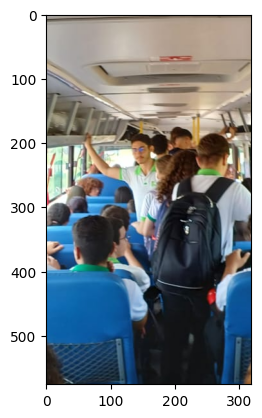

In [6]:
plt.imshow(image_preprocessing(image))
plt.show()

#Test model


(576, 1280, 3)

0: 640x384 5 persons, 151.5ms
Speed: 8.2ms preprocess, 151.5ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 384)
0.8491026666666668
2.074230182268986
3.4312464569161003
-0.30627933594952295
0.7727046454410875


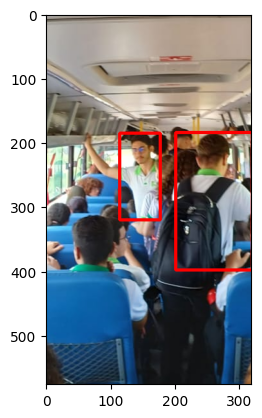

In [6]:
test_image = image_preprocessing(image)

pred = model.predict(test_image, classes=0)
image_height = test_image.shape[0]

for r in pred:
  for bbox in r.boxes:
    x1, y1, x2, y2 = bbox.xyxy[0]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    width, height = (x1 - x2), (y1 - y2)

    is_standing = (height ** 2 / width ** 2) - 1 - (y1 / (image_height * 2) )
    print(is_standing)

    if (is_standing >= 1):
      cv2.rectangle(test_image, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(test_image)
plt.show()

In [ ]:
def predict(image):
  global model

  test_image = image_preprocessing(image)

  pred = model.predict(test_image, classes=0)

  count = 0
  image_height = test_image.shape[0]

  for r in pred:
    for bbox in r.boxes:
      x1, y1, x2, y2 = bbox.xyxy[0]
      x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

      width, height = (x1 - x2), (y1 - y2)

      is_standing = (height ** 2 / width ** 2) - 1 - (y1 / (image_height * 2) ) >= 1

      if (is_standing):
        count += 1

        cv2.rectangle(test_image, (x1, y1), (x2, y2), (255, 0, 0), 3)

  return test_image, count

In [ ]:
# FUNCIONA SÓ NA MAQUINA LOCAL (pq precisa de uma câmera kskskksks)

cam = cv2.VideoCapture(0)

while cam.isOpened():
  _, frame = cam.read()

  frame = np.array(frame)

  image, count = predict(frame)

  cv2.imshow(image)

  if cv2.waitKey(1) == ord('q'):
    break


cam.release()
cv2.destroyAllWindows()